In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import numpy as np

from pathlib import Path
import json

In [2]:
data_json_fp = Path('test_scripts/depth_timelines.json')
with open(data_json_fp, 'r') as f:
    data_dict = json.load(f)

In [6]:
max_time = max([max(data[0]) for data in data_dict.values()])


data = pd.DataFrame(columns=["stream", "start_time", "stop_time", "depth"])
for stream in tqdm.tqdm(data_dict):
    times = data_dict[stream][0]
    depths = data_dict[stream][1]

    data = pd.concat(
        [
            data,
            pd.DataFrame(
                {
                    "stream": stream,
                    "start_time": times[:-1],
                    "stop_time": times[1:],
                    "depth": depths[:-1],
                }
            ),
        ]
    )


100%|██████████| 238/238 [00:05<00:00, 46.11it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


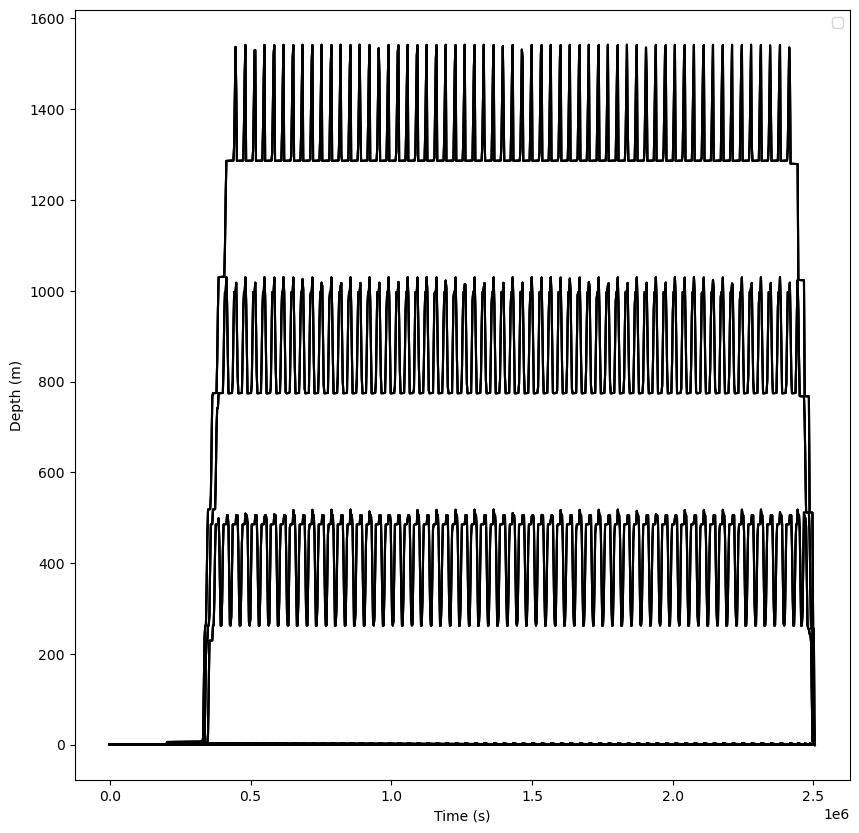

In [16]:
sample_times = np.linspace(0, max_time, 1000)

fig, ax = plt.subplots(figsize=(10, 10))
for stream in data_dict:
    times = data_dict[stream][0]
    depths = data_dict[stream][1]
    ax.plot(sample_times, np.interp(sample_times, times, depths, right=0.0),  color="k")

ax.set_xlabel("Time (s)")
ax.set_ylabel("Depth (m)")
ax.legend()
plt.show()